In [1]:
!pip install haversine
!pip install utm

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
  Created wheel for utm: filename=utm-0.6.0-py3-none-any.whl size=6093 sha256=12b6de8204df97e8ee7fb37642082a206c1104d4b19f1daa2d9e70fbd44135e2
  Stored in directory: /home/ec2-user/.cache/pip/wheels/d7/c1/52/5667edfafc8e44623ca4f2d5a4a059f8252d678c0faa22c9de
Successfully built utm
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from haversine import haversine
import utm
import math
import itertools

possibleLocations_data = pd.read_csv('./tp1_facility.csv')
cardiacArrest_data = pd.read_csv('./tp1_ohca.csv')

In [3]:
class Facility:
    def __init__(self, lat, long):
        self.lat = lat
        self.long = long
        self.demandList = set()
    

    def getLatLong(self):
        return (self.lat,self.long)

    def reset(self):
        self.demandList = set()

    def addToDemandList(self, demand):
        self.demandList.add(demand)

    def removeFromDemandList(self, demand):
        self.demandList.remove(demand)

  

In [13]:
class Demand:
    def __init__(self,lat,long):
        self.lat = lat
        self.long = long
        self.facilitySet = dict()

    def getLatLong(self):
        return (self.lat,self.long)
  
    def coveredByFacility(self, facility, time):
        self.facilitySet[facility] = time

In [19]:
from math import sqrt, pow
from utm import from_latlon

#Dij
def getTravelTime(candidate, demand):
  #totalDistance = haversine(candidate.getLatLong(), demand.getLatLong()) * 2
    candidateDistance = from_latlon(candidate.lat, candidate.long)
    demandDistance = from_latlon(demand.lat, demand.long)
    totalDistance = sqrt(pow(abs(candidateDistance[0]-demandDistance[0]), 2) + 
                         pow(abs(candidateDistance[1]-demandDistance[1]), 2)) / 500
    # Assuming average walking speed of Singaporean is 100m / min
    totalTime = totalDistance * 1000 / 100
    if totalTime < 1:
        totalTime = 1
    return totalTime

#Pij 
def getSurvivalProbability(travelTime):
    survivalProbability = 0.549 * pow(travelTime, -0.584)
    return survivalProbability

#I
setOfOHCAs = set()
for index,location in cardiacArrest_data.iterrows():
    setOfOHCAs.add(Demand(location['Lat'],location['Lon']))

#J
setOfCandidateLocations = set()
for index,location in possibleLocations_data.iterrows():
    setOfCandidateLocations.add(Facility(location['Lat'],location['Lon']))

#N
setOfCandidateCoverDemand = set()
for candidate in setOfCandidateLocations:
    for demand in setOfOHCAs:
        totalTime = getTravelTime(candidate, demand)
        if totalTime <= 20:
            setOfCandidateCoverDemand.add(candidate)
            demand.coveredByFacility(candidate, totalTime)

print(setOfCandidateCoverDemand)

{<__main__.Facility object at 0x7f459fec1898>, <__main__.Facility object at 0x7f459fe78898>, <__main__.Facility object at 0x7f459fe788d0>, <__main__.Facility object at 0x7f45a6baf908>, <__main__.Facility object at 0x7f459fec1940>, <__main__.Facility object at 0x7f45a6baf978>, <__main__.Facility object at 0x7f45a6baf278>, <__main__.Facility object at 0x7f45a6baf2b0>, <__main__.Facility object at 0x7f459fe78320>, <__main__.Facility object at 0x7f459fe78390>, <__main__.Facility object at 0x7f45a6bafba8>, <__main__.Facility object at 0x7f45a6baf438>, <__main__.Facility object at 0x7f45a6bafc88>, <__main__.Facility object at 0x7f45a6baf550>, <__main__.Facility object at 0x7f459fe78588>, <__main__.Facility object at 0x7f459fec15c0>, <__main__.Facility object at 0x7f459fec15f8>, <__main__.Facility object at 0x7f45a6c25e10>, <__main__.Facility object at 0x7f45a6baf630>, <__main__.Facility object at 0x7f45a6c25e48>, <__main__.Facility object at 0x7f459fe78630>, <__main__.Facility object at 0x7f

In [20]:

#m
numberOfOHCAs = len(setOfOHCAs)

#n
numberOfAvailableAED = 20

#l
numberOfCandidateLocations = len(setOfCandidateCoverDemand)

#M
M = numberOfOHCAs



In [21]:
from timeit import default_timer as timer  

start = timer()

currentSurvivalProbability = 0
listOfLocations = set()
sumOfSurvivalProbability = 0

for setOfCandidates in itertools.combinations(setOfCandidateCoverDemand, numberOfAvailableAED):  
    for arrest in setOfOHCAs:
        for candidate in setOfCandidates:
            if candidate in arrest.facilitySet:
                sumOfSurvivalProbability+=getSurvivalProbability(arrest.facilitySet[candidate])

    if sumOfSurvivalProbability > currentSurvivalProbability:
        listOfLocations.clear()
        listOfLocations.add(setOfCandidates)
        currentSurvivalProbability = sumOfSurvivalProbability
    elif sumOfSurvivalProbability == currentSurvivalProbability:
        listOfLocations.add(setOfCandidates)
    sumOfSurvivalProbability = 0

    
objectiveValue = 1 / M * currentSurvivalProbability
print("Objective Value: ", objectiveValue)
print(listOfLocations)
print("Solution Time:", timer()-start)  
    

Objective Value:  0.02954524808437836
{(<__main__.Facility object at 0x7f459fec1898>, <__main__.Facility object at 0x7f459fe78898>, <__main__.Facility object at 0x7f459fe788d0>, <__main__.Facility object at 0x7f45a6baf908>, <__main__.Facility object at 0x7f459fec1940>, <__main__.Facility object at 0x7f45a6baf2b0>, <__main__.Facility object at 0x7f459fe78320>, <__main__.Facility object at 0x7f45a6bafba8>, <__main__.Facility object at 0x7f45a6baf438>, <__main__.Facility object at 0x7f45a6baf550>, <__main__.Facility object at 0x7f459fe78588>, <__main__.Facility object at 0x7f459fec15c0>, <__main__.Facility object at 0x7f459fec15f8>, <__main__.Facility object at 0x7f45a6c25e10>, <__main__.Facility object at 0x7f45a6c25e48>, <__main__.Facility object at 0x7f459fec16a0>, <__main__.Facility object at 0x7f45a6baf6a0>, <__main__.Facility object at 0x7f459fe786a0>, <__main__.Facility object at 0x7f45a6bafef0>, <__main__.Facility object at 0x7f459fe78780>)}
Soluton Time: 40.44743422300007


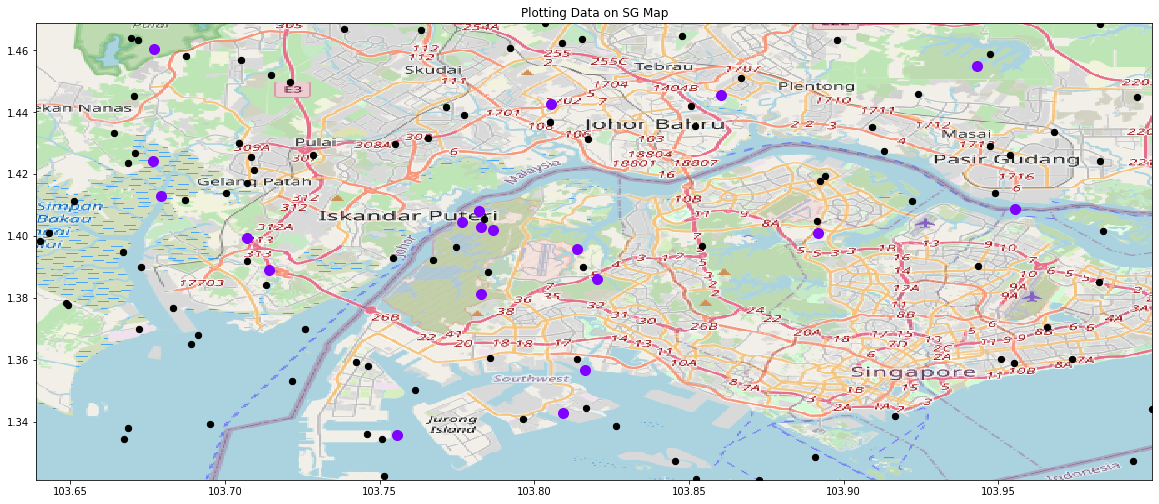

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

BBox = ((possibleLocations_data.Lon.min(),cardiacArrest_data.Lon.max(),
         cardiacArrest_data.Lat.min(), cardiacArrest_data.Lat.max()))
    
ruh_m = plt.imread('./tp_1map.png')

colors = cm.rainbow(np.linspace(0, 1, len(listOfLocations)))
fig, ax = plt.subplots(figsize = (20,20))
for facilities, c in zip(listOfLocations, colors):
    for facility in facilities:
        ax.scatter(facility.long, facility.lat, zorder=1, alpha=1.0, color=c, s=100)

ax.scatter(cardiacArrest_data.Lon, cardiacArrest_data.Lat, zorder=1, alpha=1.0, c='black', s=40)
# ax.scatter(possibleLocations_data.Lon, possibleLocations_data.Lat, zorder=1, alpha=1.0, c='r', s=10)
ax.set_title('Plotting Data on SG Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
